If working in Google collab first mount your drive on left hand side and then run this first step to get your data.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read in the data

In [58]:
data = pd.read_csv("m5-forecasting-accuracy/sales_train_evaluation.csv")
data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [59]:
cal = pd.read_csv("m5-forecasting-accuracy/calendar.csv")
cal

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [60]:
sell_prices = pd.read_csv("m5-forecasting-accuracy/sell_prices.csv")
sell_prices["sell_id"] = sell_prices["store_id"] + sell_prices["item_id"] + sell_prices["wm_yr_wk"].astype(str)

In [61]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price,sell_id
0,CA_1,HOBBIES_1_001,11325,9.58,CA_1HOBBIES_1_00111325
1,CA_1,HOBBIES_1_001,11326,9.58,CA_1HOBBIES_1_00111326
2,CA_1,HOBBIES_1_001,11327,8.26,CA_1HOBBIES_1_00111327
3,CA_1,HOBBIES_1_001,11328,8.26,CA_1HOBBIES_1_00111328
4,CA_1,HOBBIES_1_001,11329,8.26,CA_1HOBBIES_1_00111329


In [62]:
# It is false so no values in entire dataset is null
data.isnull().values.any()


False

In [63]:
# It is false so no values in entire dataset is null
sell_prices.isnull().values.any()


False

In [64]:
# Look at data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [65]:
data["state_id"].value_counts()

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

In [66]:
data["store_id"].value_counts()

CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64

In [67]:
data["cat_id"].value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [68]:
data["item_id"].value_counts()

HOBBIES_1_001      10
FOODS_2_210        10
FOODS_2_201        10
FOODS_2_202        10
FOODS_2_203        10
                   ..
HOUSEHOLD_1_464    10
HOUSEHOLD_1_465    10
HOUSEHOLD_1_466    10
HOUSEHOLD_1_467    10
FOODS_3_827        10
Name: item_id, Length: 3049, dtype: int64

In [84]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,store_id_cat_id
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,0,0,0,0,3,3,0,1,CA_1HOBBIES
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,0,0,0,0,0,CA_1HOBBIES
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,2,0,0,0,2,3,0,1,CA_1HOBBIES
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,4,0,1,3,0,2,6,CA_1HOBBIES
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,2,1,0,0,2,1,0,CA_1HOBBIES


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# We now want to sample a proportion of the data so out of the around 30,0000 we want to sample 10%
# We want to make data distribtution of sample equivalent to original data with respect to state_id and cat_id
# so we concat and then do a stratified sample on this column using train test split function

data["store_id_cat_id"] = data["store_id"] + data["cat_id"]

X = data.loc[:, data.columns != "store_id_cat_id"]
y = data.loc[:, data.columns == "store_id_cat_id"]

y.value_counts() / np.sum(y.value_counts())

store_id_cat_id
CA_1FOODS          0.047130
CA_4FOODS          0.047130
WI_3FOODS          0.047130
WI_2FOODS          0.047130
WI_1FOODS          0.047130
TX_3FOODS          0.047130
TX_1FOODS          0.047130
TX_2FOODS          0.047130
CA_3FOODS          0.047130
CA_2FOODS          0.047130
CA_3HOUSEHOLD      0.034339
TX_2HOUSEHOLD      0.034339
CA_1HOUSEHOLD      0.034339
WI_2HOUSEHOLD      0.034339
WI_1HOUSEHOLD      0.034339
TX_3HOUSEHOLD      0.034339
CA_2HOUSEHOLD      0.034339
WI_3HOUSEHOLD      0.034339
TX_1HOUSEHOLD      0.034339
CA_4HOUSEHOLD      0.034339
TX_2HOBBIES        0.018531
CA_3HOBBIES        0.018531
CA_1HOBBIES        0.018531
CA_2HOBBIES        0.018531
WI_1HOBBIES        0.018531
TX_1HOBBIES        0.018531
WI_2HOBBIES        0.018531
CA_4HOBBIES        0.018531
WI_3HOBBIES        0.018531
TX_3HOBBIES        0.018531
dtype: float64

In [71]:
X_train, sample, y_train, member = train_test_split(X, y, test_size=0.10, random_state=123)

# Values are roughly similar distribution then the original
member.value_counts() / np.sum(member.value_counts())
#id_sample = sample[["Person_Id"]]
#sample.drop(columns = ["Person_Id"], inplace = True)

store_id_cat_id
WI_2FOODS          0.052476
CA_2FOODS          0.050836
CA_4FOODS          0.049852
WI_3FOODS          0.049196
TX_1FOODS          0.047229
CA_1FOODS          0.046245
WI_1FOODS          0.043621
TX_3FOODS          0.042309
TX_2FOODS          0.041653
TX_1HOUSEHOLD      0.039357
CA_3FOODS          0.038373
WI_3HOUSEHOLD      0.038045
WI_1HOUSEHOLD      0.037389
CA_3HOUSEHOLD      0.035421
CA_4HOUSEHOLD      0.034110
WI_2HOUSEHOLD      0.033782
TX_2HOUSEHOLD      0.033454
TX_3HOUSEHOLD      0.032142
CA_1HOUSEHOLD      0.030174
CA_2HOUSEHOLD      0.026894
WI_3HOBBIES        0.025254
WI_1HOBBIES        0.023942
TX_3HOBBIES        0.021646
TX_1HOBBIES        0.021318
WI_2HOBBIES        0.019351
CA_2HOBBIES        0.019023
CA_1HOBBIES        0.018367
CA_3HOBBIES        0.018367
CA_4HOBBIES        0.017711
TX_2HOBBIES        0.012463
dtype: float64

In [72]:
sample

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
10216,HOUSEHOLD_1_514_CA_4_evaluation,HOUSEHOLD_1_514,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,0,0,0,0,...,3,2,2,2,2,2,1,1,1,1
25101,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,0,1,2,1,...,0,0,1,1,2,1,3,3,1,1
9940,HOUSEHOLD_1_233_CA_4_evaluation,HOUSEHOLD_1_233,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4842,FOODS_1_185_CA_2_evaluation,FOODS_1_185,FOODS_1,FOODS,CA_2,CA,2,1,0,0,...,2,0,1,3,0,0,1,2,0,3
1864,FOODS_2_037_CA_1_evaluation,FOODS_2_037,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,HOUSEHOLD_1_502_CA_2_evaluation,HOUSEHOLD_1_502,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
22335,HOUSEHOLD_1_437_WI_1_evaluation,HOUSEHOLD_1_437,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,0,0,0,4,...,5,4,3,2,1,4,2,3,2,3
21954,HOUSEHOLD_1_049_WI_1_evaluation,HOUSEHOLD_1_049,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3920,HOUSEHOLD_1_313_CA_2_evaluation,HOUSEHOLD_1_313,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,1,2,1,0,...,0,2,1,1,1,2,0,1,0,1


In [116]:
# Data is in wide format lets melt to long for possible regression
day_list = sample.columns.values.tolist()[6:]
long_sample = pd.melt(id_vars = ["id","item_id", "dept_id","cat_id","store_id","state_id"], value_vars = day_list, var_name = "day", 
             value_name = "sales_units", frame = sample)

In [117]:
long_sample

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales_units
0,HOUSEHOLD_1_514_CA_4_evaluation,HOUSEHOLD_1_514,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,d_1,0
1,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_1,0
2,HOUSEHOLD_1_233_CA_4_evaluation,HOUSEHOLD_1_233,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,d_1,0
3,FOODS_1_185_CA_2_evaluation,FOODS_1_185,FOODS_1,FOODS,CA_2,CA,d_1,2
4,FOODS_2_037_CA_1_evaluation,FOODS_2_037,FOODS_2,FOODS,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
5918104,HOUSEHOLD_1_502_CA_2_evaluation,HOUSEHOLD_1_502,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,d_1941,1
5918105,HOUSEHOLD_1_437_WI_1_evaluation,HOUSEHOLD_1_437,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_1941,3
5918106,HOUSEHOLD_1_049_WI_1_evaluation,HOUSEHOLD_1_049,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_1941,0
5918107,HOUSEHOLD_1_313_CA_2_evaluation,HOUSEHOLD_1_313,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,d_1941,1


In [118]:
# Merge with calendar
long_sample_cal = long_sample.merge(cal, left_on="day", right_on = "d", how='left')
long_sample_cal

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales_units,date,wm_yr_wk,...,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOUSEHOLD_1_514_CA_4_evaluation,HOUSEHOLD_1_514,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,d_1,0,2011-01-29,11101,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_1,0,2011-01-29,11101,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2,HOUSEHOLD_1_233_CA_4_evaluation,HOUSEHOLD_1_233,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,d_1,0,2011-01-29,11101,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
3,FOODS_1_185_CA_2_evaluation,FOODS_1_185,FOODS_1,FOODS,CA_2,CA,d_1,2,2011-01-29,11101,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
4,FOODS_2_037_CA_1_evaluation,FOODS_2_037,FOODS_2,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918104,HOUSEHOLD_1_502_CA_2_evaluation,HOUSEHOLD_1_502,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,d_1941,1,2016-05-22,11617,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
5918105,HOUSEHOLD_1_437_WI_1_evaluation,HOUSEHOLD_1_437,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_1941,3,2016-05-22,11617,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
5918106,HOUSEHOLD_1_049_WI_1_evaluation,HOUSEHOLD_1_049,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_1941,0,2016-05-22,11617,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
5918107,HOUSEHOLD_1_313_CA_2_evaluation,HOUSEHOLD_1_313,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,d_1941,1,2016-05-22,11617,...,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0


In [119]:
long_sample['id'].value_counts()

HOUSEHOLD_1_514_CA_4_evaluation    1941
HOBBIES_1_129_WI_1_evaluation      1941
HOUSEHOLD_1_445_CA_3_evaluation    1941
FOODS_3_328_WI_1_evaluation        1941
FOODS_3_232_WI_2_evaluation        1941
                                   ... 
HOUSEHOLD_1_338_CA_2_evaluation    1941
FOODS_3_209_WI_3_evaluation        1941
FOODS_3_716_WI_2_evaluation        1941
FOODS_3_595_CA_3_evaluation        1941
FOODS_3_292_CA_1_evaluation        1941
Name: id, Length: 3049, dtype: int64

([<matplotlib.axis.YTick at 0x7fd77fe39610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

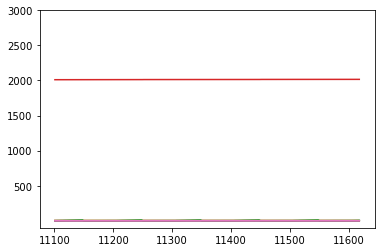

In [120]:
plt.plot(long_sample_cal.groupby('wm_yr_wk').mean("sales_units"))
plt.yticks(ticks= [500,1000,1500,2000,2500,3000])

In [121]:
long_sample_cal["sell_id"] = long_sample_cal["store_id"] + long_sample_cal["item_id"] + long_sample_cal["wm_yr_wk"].astype(str)

In [122]:
# Merge with sell_prices
# Merge with calendar
long_sample_merge = long_sample_cal.merge(sell_prices, on=["store_id", "item_id", "wm_yr_wk"])
long_sample_merge

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales_units,date,wm_yr_wk,...,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_id_x,sell_price,sell_id_y
0,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_1,0,2011-01-29,11101,...,NaN,NaN,NaN,NaN,0,0,0,WI_2HOUSEHOLD_1_14911101,0.97,WI_2HOUSEHOLD_1_14911101
1,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_2,1,2011-01-30,11101,...,NaN,NaN,NaN,NaN,0,0,0,WI_2HOUSEHOLD_1_14911101,0.97,WI_2HOUSEHOLD_1_14911101
2,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_3,2,2011-01-31,11101,...,NaN,NaN,NaN,NaN,0,0,0,WI_2HOUSEHOLD_1_14911101,0.97,WI_2HOUSEHOLD_1_14911101
3,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_4,1,2011-02-01,11101,...,NaN,NaN,NaN,NaN,1,1,0,WI_2HOUSEHOLD_1_14911101,0.97,WI_2HOUSEHOLD_1_14911101
4,HOUSEHOLD_1_149_WI_2_evaluation,HOUSEHOLD_1_149,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,d_5,0,2011-02-02,11101,...,NaN,NaN,NaN,NaN,1,0,1,WI_2HOUSEHOLD_1_14911101,0.97,WI_2HOUSEHOLD_1_14911101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651118,HOUSEHOLD_1_049_WI_1_evaluation,HOUSEHOLD_1_049,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,d_1941,0,2016-05-22,11617,...,NaN,NaN,NaN,NaN,0,0,0,WI_1HOUSEHOLD_1_04911617,5.97,WI_1HOUSEHOLD_1_04911617
4651119,HOUSEHOLD_1_313_CA_2_evaluation,HOUSEHOLD_1_313,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,d_1940,0,2016-05-21,11617,...,NaN,NaN,NaN,NaN,0,0,0,CA_2HOUSEHOLD_1_31311617,3.97,CA_2HOUSEHOLD_1_31311617
4651120,HOUSEHOLD_1_313_CA_2_evaluation,HOUSEHOLD_1_313,HOUSEHOLD_1,HOUSEHOLD,CA_2,CA,d_1941,1,2016-05-22,11617,...,NaN,NaN,NaN,NaN,0,0,0,CA_2HOUSEHOLD_1_31311617,3.97,CA_2HOUSEHOLD_1_31311617
4651121,FOODS_3_292_CA_1_evaluation,FOODS_3_292,FOODS_3,FOODS,CA_1,CA,d_1940,8,2016-05-21,11617,...,NaN,NaN,NaN,NaN,0,0,0,CA_1FOODS_3_29211617,3.56,CA_1FOODS_3_29211617


In [123]:
long_sample_merge['id'].value_counts()

HOUSEHOLD_1_149_WI_2_evaluation    1941
HOUSEHOLD_1_215_TX_2_evaluation    1941
FOODS_2_202_CA_3_evaluation        1941
FOODS_3_533_TX_3_evaluation        1941
FOODS_3_305_WI_2_evaluation        1941
                                   ... 
HOUSEHOLD_2_313_WI_3_evaluation     219
FOODS_2_045_CA_2_evaluation         198
FOODS_2_184_CA_2_evaluation         198
HOUSEHOLD_1_020_WI_2_evaluation     100
FOODS_3_595_CA_3_evaluation         100
Name: id, Length: 3049, dtype: int64

In [124]:
long_sample_merge.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day',
       'sales_units', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'd', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_id_x', 'sell_price',
       'sell_id_y'],
      dtype='object')

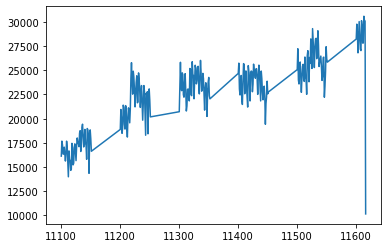

In [125]:
#Lets look at weekly aggregation of the data
plt.plot(long_sample_merge.groupby('wm_yr_wk')["sales_units"].sum())

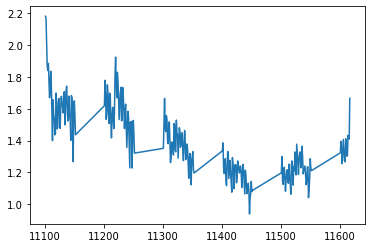

In [126]:
#Lets look at weekly aggregation of the data

#plt.figure(figsize = (20,5))

#plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 'vertical')
plt.plot(long_sample_merge.groupby('wm_yr_wk')["sales_units"].mean())

In [127]:
long_sample_merge['wm_yr_wk'].value_counts()

11615    21343
11608    21343
11616    21343
11603    21343
11604    21343
         ...  
11104     8743
11103     8526
11102     8141
11101     7399
11617     6098
Name: wm_yr_wk, Length: 278, dtype: int64

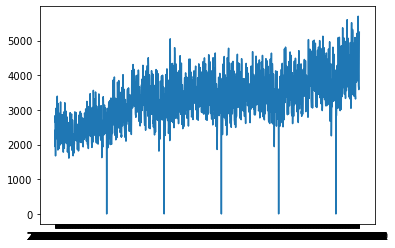

In [128]:
#Lets look at daily aggregation of the data for a year
plt.plot(long_sample_merge.groupby('date')["sales_units"].sum())

In [129]:
long_sample_merge["year"] = pd.DatetimeIndex(long_sample_merge['date']).year

In [130]:
long_sample_merge["month"] = pd.DatetimeIndex(long_sample_merge['date']).month

In [131]:
long_sample_merge["day_of_year"] = pd.DatetimeIndex(long_sample_merge['date']).day

In [132]:
long_sample_merge['Qtr'] = pd.DatetimeIndex(long_sample_merge['date']).quarter

In [133]:
long_sample_merge["month"].value_counts()

3     438621
4     431240
5     424369
2     391687
1     389248
12    382029
10    377535
8     370458
11    368059
7     365702
9     362474
6     349701
Name: month, dtype: int64

([<matplotlib.axis.XTick at 0x7fd7aa4529a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

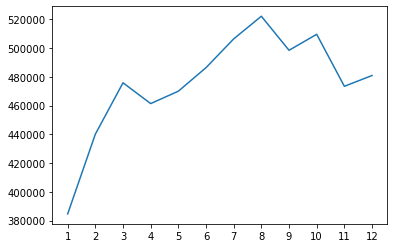

In [165]:
#Lets look at monthly aggregation of the data
plt.plot(long_sample_merge[~(long_sample_merge["year"]==2016)].groupby('month')["sales_units"].sum())
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])

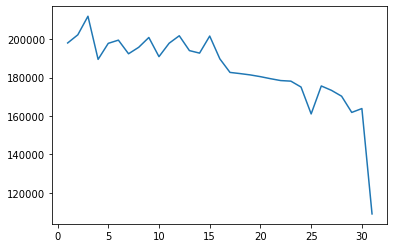

In [166]:
#Lets look at daily aggregation of the data for any month
plt.plot(long_sample_merge[~(long_sample_merge["year"]==2016)].groupby('day_of_year')["sales_units"].sum())

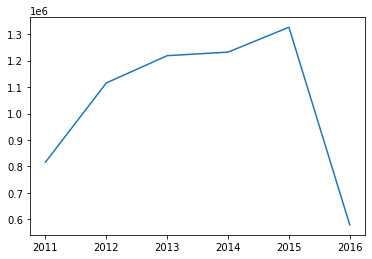

In [136]:
#Lets look at year aggregation of the data 
plt.plot(long_sample_merge.groupby('year')["sales_units"].sum())

([<matplotlib.axis.XTick at 0x7fd5d394e580>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

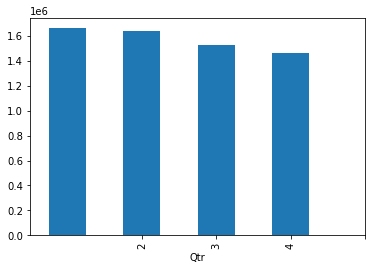

In [162]:
#Lets look at quarter aggregation of the data for any year
long_sample_merge.groupby('Qtr')["sales_units"].sum().plot(kind="bar")
plt.xticks(ticks=[1,2,3,4])

In [138]:
long_sample_merge['Qtr'].value_counts()

1    1219556
2    1205310
4    1127623
3    1098634
Name: Qtr, dtype: int64

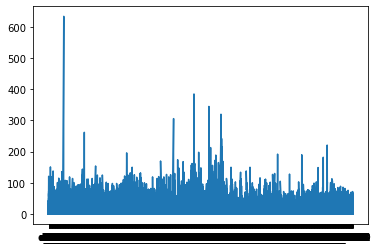

In [139]:
plt.plot(long_sample_merge['day'],long_sample_merge['sales_units'])

In [141]:
long_sample_merge['state_id'].value_counts()

CA    1783360
WI    1489764
TX    1377999
Name: state_id, dtype: int64

In [142]:
CA_long_sample_merge = long_sample_merge[long_sample_merge['state_id']=="CA"]
WI_long_sample_merge = long_sample_merge[long_sample_merge['state_id']=="WI"]
TX_long_sample_merge = long_sample_merge[long_sample_merge['state_id']=="TX"]

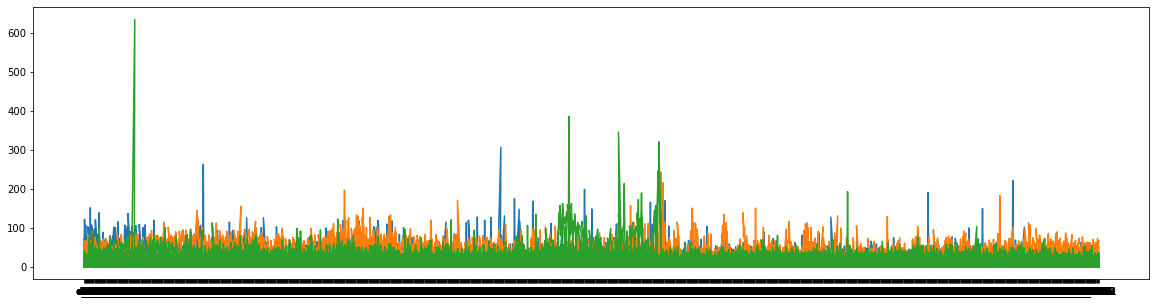

In [148]:
plt.figure(figsize = (20,5))
plt.plot(CA_long_sample_merge['day'],CA_long_sample_merge['sales_units'])
plt.plot(WI_long_sample_merge['day'],WI_long_sample_merge['sales_units'])
plt.plot(TX_long_sample_merge['day'],TX_long_sample_merge['sales_units'])

<AxesSubplot:xlabel='store_id'>

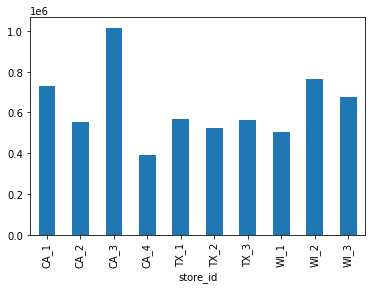

In [160]:
long_sample_merge.groupby('store_id')["sales_units"].sum().plot(kind="bar")

<AxesSubplot:xlabel='state_id'>

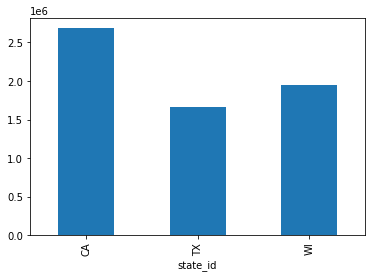

In [161]:
long_sample_merge.groupby('state_id')["sales_units"].sum().plot(kind="bar")